In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
#print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
#print(breast_cancer_wisconsin_diagnostic.variables) 


y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0}) #change binary labels 'M' to 1 and 'B' to 0


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

C:\Users\unaiz\AppData\Local\Temp\ipykernel_15768\2628873864.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0}) #change binary labels 'M' to 1 and 'B' to 0


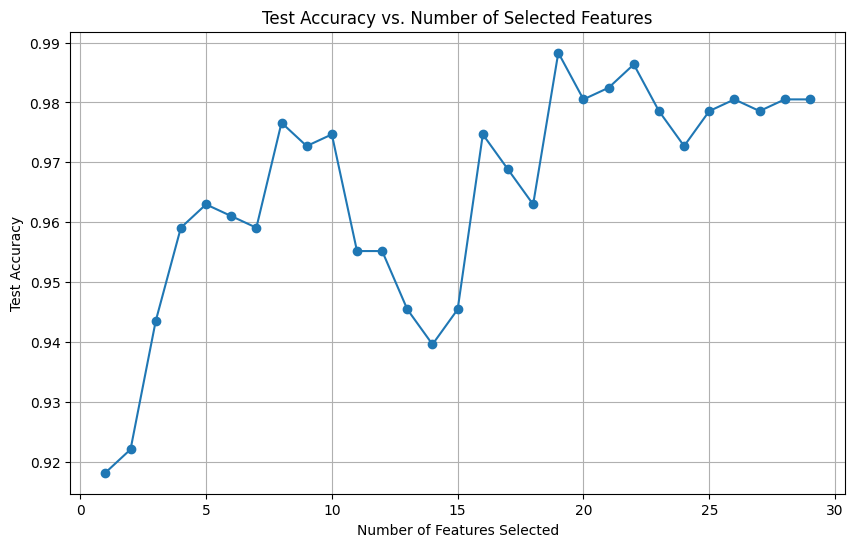

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Placeholder lists to store results
n_features = list(range(1, 30))  # We’ll try selecting 1 to 29 features
accuracies = []

# Loop over different values of k (number of features)
for k in n_features:
    accs = list()
    # Select the top k features
    selector = SelectKBest(f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, np.ravel(y_train))
    X_test_selected = selector.transform(X_test)
    for i in range(3):
        # Train a neural network on the selected features
        model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=5000)
        model.fit(X_train_selected, np.ravel(y_train))
        
        # Predict on the test set and evaluate accuracy
        y_pred = model.predict(X_test_selected)
        accuracy = accuracy_score(y_test, y_pred)
        accs.append(accuracy)
    
    # Store the accuracy for this number of features
    accuracies.append(np.mean(accs))

# Plot the number of features vs. accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_features, accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Features Selected")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. Number of Selected Features (univariate)")
plt.grid(True)
plt.show()


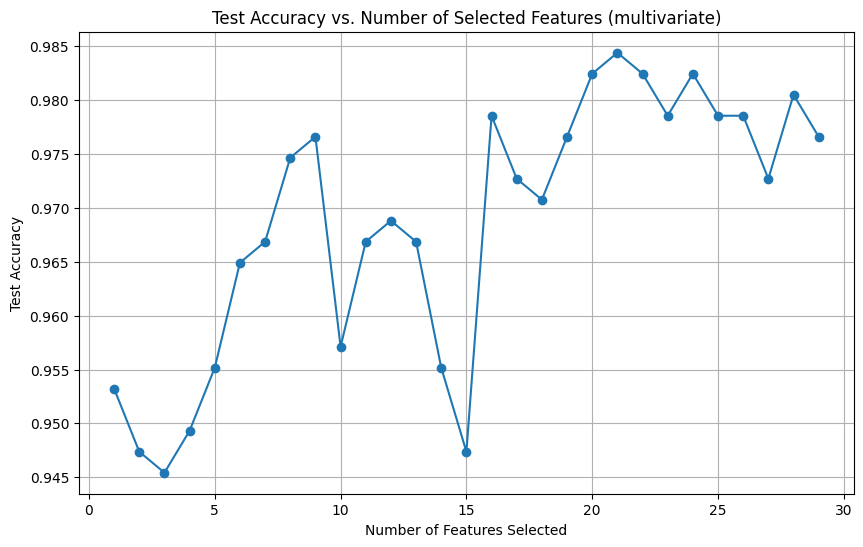

In [11]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
from sklearn import neural_network
mi = mutual_info_classif(X_train, np.ravel(y_train))

# Sort the features based on MI scores
mi_scores = pd.Series(mi, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Placeholder lists to store results
n_features = list(range(1, 30))  # We’ll try selecting 1 to 29 features
accuracies = []


# Loop over different values of k (number of features)
for k in n_features:
    accs = list()
    for i in range(3):
        # Select top 10 features
        top_features = mi_scores.index[:k]  # Select the top 10 based on MI

        # Reduce the training and testing sets to these features
        df_aux_train = pd.DataFrame(X_train, columns=X.columns.to_list())
        df_aux_train_top = df_aux_train[top_features]
        X_train_top = df_aux_train_top.to_numpy()

        df_aux_test = pd.DataFrame(X_test, columns=X.columns.to_list())
        df_aux_test_top = df_aux_test[top_features]
        X_test_top = df_aux_test_top.to_numpy()

        model = neural_network.MLPClassifier(hidden_layer_sizes=(50,50),max_iter=5000)
        model.fit(X_train_top,np.ravel(y_train))
        
        # Predict on the test set and evaluate accuracy
        y_pred = model.predict(X_test_top)
        accuracy = accuracy_score(y_test, y_pred)
        accs.append(accuracy)
    
    # Store the accuracy for this number of features
    accuracies.append(np.mean(accs))

# Plot the number of features vs. accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_features, accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Features Selected")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. Number of Selected Features (multivariate)")
plt.grid(True)
plt.show()
    

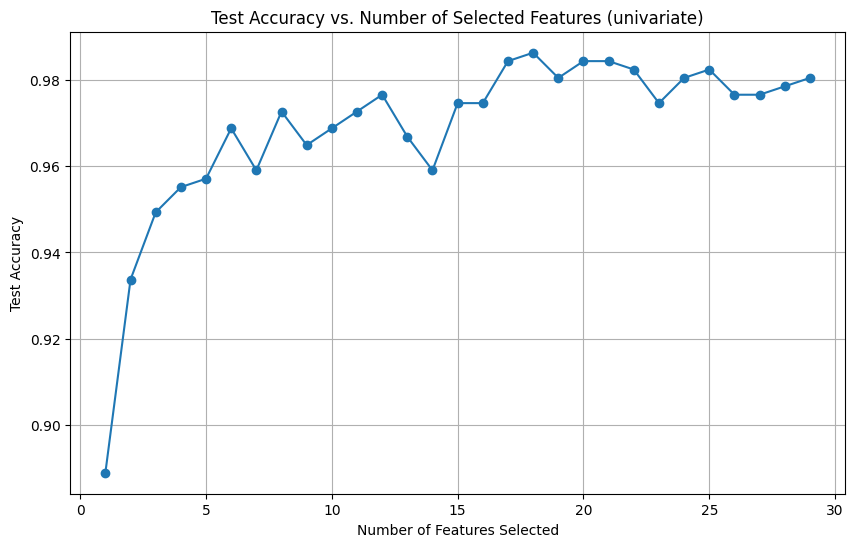

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Placeholder lists to store results
n_features = list(range(1, 30))  # We’ll try selecting 1 to 29 features
accuracies = []

# Loop over different values of k (number of features)
for k in n_features:
    accs = list()
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=k)
    X_train_rfe = rfe.fit_transform(X_train, np.ravel(y_train))
    X_test_rfe = rfe.transform(X_test)
    for i in range(3):
        # Train a neural network on the selected features
        model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=5000)
        model.fit(X_train_rfe, np.ravel(y_train))
        
        # Predict on the test set and evaluate accuracy
        y_pred = model.predict(X_test_rfe)
        accuracy = accuracy_score(y_test, y_pred)
        accs.append(accuracy)
    
    # Store the accuracy for this number of features
    accuracies.append(np.mean(accs))

# Plot the number of features vs. accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_features, accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Features Selected")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. Number of Selected Features (wrapper)")
plt.grid(True)
plt.show()